<a href="https://colab.research.google.com/github/Vimal9900/College-Work/blob/main/ML_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective : Predicting Auto MPG Using Linear Regression and Naive Bayes

### Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/auto-mpg.csv')

### EDA

In [ ]:
df=df.sample(frac=1)

In [ ]:
#Checking missing value
df.isna().any()

,0
mpg,False
cylinders,False
displacement,False
horsepower,False
weight,False
acceleration,False
model year,False
origin,False
car name,False


There is no missing value in whole dataset.

Extracting required features and respective Label

In [ ]:
x=df[['displacement','horsepower', 'weight', 'acceleration','origin']]
y=df['mpg']
y.column=['mpg']
print(x.shape,y.shape)
print(x.info())

(398, 5) (398,)
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 78 to 389
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    object 
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 18.7+ KB
None


In [ ]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 78 to 389
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    object 
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 18.7+ KB
None


Here horsepower is not a numeric number hence converting to numeric

In [ ]:
# Replace '?' with NaN (Not a Number)
x['horsepower'] = x['horsepower'].replace('?', np.nan)

# Convert the column to numeric, handling errors
x['horsepower'] = pd.to_numeric(x['horsepower'])

#imputed Null value with mean of feature horsepower
x['horsepower'].fillna(x['horsepower'].median(), inplace=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 78 to 389
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    float64
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 18.7 KB


<ipython-input-183-7e8ef27a7837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['horsepower'] = x['horsepower'].replace('?', np.nan)
<ipython-input-183-7e8ef27a7837>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['horsepower'] = pd.to_numeric(x['horsepower'])
<ipython-input-183-7e8ef27a7837>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

Splitting the dataset for Training and Testing

In [ ]:
# Split percent

splitter=int(.7*len(x))

#splitting data set for training and testing
x_=x[['displacement','horsepower', 'weight', 'acceleration']]
y_=y.copy()
x_train=x_[:splitter]
y_train=y_[:splitter]
x_test=x_[splitter:]
y_test=y_[splitter:]

print(x.shape,y.shape)
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)

(398, 5) (398,)
(120, 4) (120,) (278, 4) (278,)


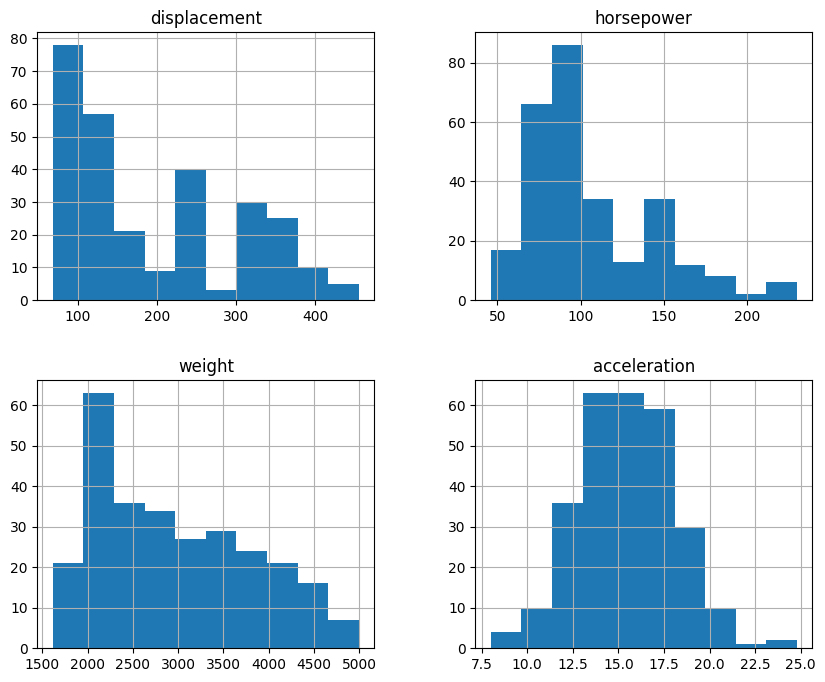

In [ ]:
x_train.hist(figsize=(10, 8))
plt.show()


## Linear Regression

### Using Least square and Gradient descent method

In [ ]:
class LinearRegression_scrach:
    def __init__(self):
        self.coefficients = None
        self.num_iterations = 10000
        self.learning_rate = 0.0001

    def least_square(self, A, y):
        # Added 1 as a last column
        A = np.c_[A, np.ones((len(A), 1))]
        # Converting to numpy array
        A = np.array(A)
        y = np.array(y)

        # Compute A^T * A and A^T * y
        AtA = np.dot(A.T, A)
        Aty = np.dot(A.T, y)

        # Solve for p = (AtA)^(-1) * Aty
        self.coefficients = np.dot(np.linalg.inv(AtA), Aty)

        return self.coefficients

    def gradient_descent(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Compute the predictions
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Store coefficients as weights and bias for consistency
        self.coefficients = np.append(self.weights, self.bias)

        return self.coefficients

    def predict(self, x,coefficients):
        x = np.c_[x, np.ones((len(x), 1))]
        y_pred = np.dot(x, coefficients)
        return y_pred

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

### standardizing the data

In [ ]:
def standardize_data(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

standardized_x_train = standardize_data(x_train)
standardized_x_test = standardize_data(x_test)

### Using Least sqaure

In [ ]:
# Create an instance of the LinearRegression class
model = LinearRegression_scrach()

# Fit the model using least squares
coefficients = model.least_square(standardized_x_train, y_train)
print("Coefficients (Least Squares): ", coefficients)

# # Predict using the fitted model
y_pred = model.predict(standardized_x_test,coefficients)

# # Calculate MSE
mse = model.mean_squared_error(y_test, y_pred)
print("Mean Squared Error using least square: ", mse)

# Calculate R-squared
r2 = model.r2_score(y_test, y_pred)
print("R-squared using least square: ", r2)



Coefficients (Least Squares):  [-0.48869969 -1.72238348 -4.6708206  -0.14086711 23.57697842]
Mean Squared Error using least square:  18.474297233505414
R-squared using least square:  0.6912980806531293


### Using gradient descent

In [ ]:
# Fit the model using gradient descent
model = LinearRegression_scrach()
model.learning_rate = 0.01
model.num_iterations = 100000
gradient_descent_coefficients = model.gradient_descent(standardized_x_train, y_train)
print("Coefficients (Gradient Descent): ", gradient_descent_coefficients)
# Predict using the fitted model
y_pred = model.predict(standardized_x_test,gradient_descent_coefficients )

# Calculate MSE
mse = model.mean_squared_error(y_test, y_pred)
print("Mean Squared Error using gradient Descent: ", mse)

# Calculate R-squared
r2 = model.r2_score(y_test, y_pred)
print("R-squared using gradient Descent: ", r2)

Coefficients (Gradient Descent):  [-0.48869969 -1.72238348 -4.6708206  -0.14086711 23.57697842]
Mean Squared Error using gradient Descent:  18.474297233505297
R-squared using gradient Descent:  0.6912980806531313


## Naive Bayes Implementation

### Categorizing fetures based on there range of values into 3 category

In [ ]:
# Analyze the data and categorize columns into low, medium, high
def categorize_column(df, column_name):

  values = df[column_name]

  # Calculate quartiles
  q1 = values.quantile(0.25)
  q2 = values.quantile(0.5)  # Median
  q3 = values.quantile(0.75)

  categories = {}
  categories['low'] = f"<= {q1:.2f}"
  categories['medium'] = f"{q1:.2f} - {q3:.2f}"
  categories['high'] = f">= {q3:.2f}"

  return categories

# Apply the function to each feature column
for col in x.columns:
  print(f"Column: {col}")
  categories = categorize_column(x, col)
  print(categories)
  print("\n")

for col in y.column:
  print(f"Column: {col}")
  categories = categorize_column(pd.DataFrame(y), col)
  print(categories)
  print("\n")

Column: displacement
{'low': '<= 104.25', 'medium': '104.25 - 262.00', 'high': '>= 262.00'}


Column: horsepower
{'low': '<= 76.00', 'medium': '76.00 - 125.00', 'high': '>= 125.00'}


Column: weight
{'low': '<= 2223.75', 'medium': '2223.75 - 3608.00', 'high': '>= 3608.00'}


Column: acceleration
{'low': '<= 13.83', 'medium': '13.83 - 17.18', 'high': '>= 17.18'}


Column: origin
{'low': '<= 1.00', 'medium': '1.00 - 2.00', 'high': '>= 2.00'}


Column: mpg
{'low': '<= 17.50', 'medium': '17.50 - 29.00', 'high': '>= 29.00'}




Column: displacement
{'low': '<= 104.25', 'medium': '104.25 - 262.00', 'high': '>= 262.00'}


Column: horsepower
{'low': '<= 76.00', 'medium': '76.00 - 125.00', 'high': '>= 125.00'}


Column: weight
{'low': '<= 2223.75', 'medium': '2223.75 - 3608.00', 'high': '>= 3608.00'}


Column: acceleration
{'low': '<= 13.83', 'medium': '13.83 - 17.18', 'high': '>= 17.18'}

In [ ]:
# Fetching required features and making a copy of the dataset
x_bayes = x[['displacement','horsepower', 'weight', 'origin']]
y_bayes = y.copy()

#Label category
y_bayes = pd.cut(x=y_bayes, bins=[0,20,30,y_bayes.max()], labels=['low','medium','high'])

#Feature category
x_bayes['displacement'] = pd.cut(x=x['displacement'], bins=[0,100,262,x_bayes['displacement'].max()], labels=['small','medium','large']) # Create a new column for categorized displacement
x_bayes['horsepower'] = pd.cut(x=x['horsepower'], bins=[0,76,125,x_bayes['horsepower'].max()], labels=['low','medium','high']) # Create a new column for categorized horsepower
x_bayes['weight'] = pd.cut(x=x['weight'], bins=[0,2223,3608,x_bayes['weight'].max()], labels=['light','medium','heavy']) # Create a new column for categorized weight
x_bayes['origin'] = pd.cut(x=x['origin'], bins=[0,1,2,x_bayes['origin'].max()], labels=['USA','RUSSIA','INDIA']) # Create a new column for categorized origin

<ipython-input-196-bd7ad74b12c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_bayes['displacement'] = pd.cut(x=x['displacement'], bins=[0,100,262,x_bayes['displacement'].max()], labels=['small','medium','large']) # Create a new column for categorized displacement
<ipython-input-196-bd7ad74b12c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_bayes['horsepower'] = pd.cut(x=x['horsepower'], bins=[0,76,125,x_bayes['horsepower'].max()], labels=['low','medium','high']) # Create a new column for catego

### splitting data set for training and testing

In [ ]:
# Split percent
splitter=int(.7*len(x))

x_train_bayes=x_bayes[:splitter]
y_train_bayes=y_bayes[:splitter]
x_test_bayes=x_bayes[splitter:]
y_test_bayes=y_bayes[splitter:]

print(x_train_bayes.shape,y_train_bayes.shape)
print(x_test_bayes.shape,y_test_bayes.shape)

(278, 4) (278,)
(120, 4) (120,)


### NB Implementation

In [ ]:
class NaiveBayesClassifier_scrach:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}
        self.feature_classes = {}

    def calculate_prior(self,y,label='mpg'):
        classes = y[label].unique()
        prior = {}
        for cls in classes:
            prior[cls] = len(y[y[label]==cls]) / len(y)
        return prior

    def fit(self, X, y):
        # Calculate prior probabilities for each class
        self.classes = y.unique()
        self.class_probs = self.calculate_prior(y.to_frame(), 'mpg')

        # Initialize dictionaries to hold feature probabilities for each class
        self.feature_probs = {cls: {col: {} for col in X.columns} for cls in self.classes}
        self.feature_classes = {col: X[col].unique() for col in X.columns}

        # Calculate probabilities for each feature given each class
        for cls in self.classes:
            X_cls = X[y == cls]  # Filter rows where y == cls
            for col in X.columns:
                col_values = self.feature_classes[col]
                feature_counts = X_cls[col].value_counts()
                total = len(X_cls)  # Total count of examples for this class

                # Calculate conditional probabilities
                self.feature_probs[cls][col] = {val: feature_counts.get(val, 0) / total for val in col_values}

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            probs = {}
            for cls in self.classes:
                prob = self.class_probs[cls]
                for col in X.columns:
                    prob *= self.feature_probs[cls][col].get(row[col], 0)
                probs[cls] = prob

            # Choose the class with the highest probability
            predictions.append(max(probs, key=probs.get))

        return np.array(predictions)

    def accuracy(self,y_true,y_pred):
        print("Naive Bayes Accuracy: ",np.sum(y_true==y_pred)/len(y_true))
        # return np.sum(y_true==y_pred)/len(y_true)


In [ ]:
NB =NaiveBayesClassifier_scrach()
NB.fit(x_train_bayes,y_train_bayes)

In [ ]:
y_train_NB_pred = NB.predict(x_train_bayes)
NB.accuracy(y_train_bayes,y_train_NB_pred)

Naive Bayes Accuracy:  0.7302158273381295


In [ ]:
y_test_NB_pred = NB.predict(x_test_bayes)

In [ ]:
NB.accuracy(y_test_bayes,y_test_NB_pred)

Naive Bayes Accuracy:  0.775


## Hybrid Model - Combining Naive Bayes and Linear Regression

### One hot encoded the output of the NB Classifier

In [ ]:
def transform(X):
    categories=np.unique(X)
    category_to_index = {category: idx for idx, category in enumerate(categories)}
    one_hot_encoded = np.zeros((len(X), len(categories)))
    for i, value in enumerate(X):
        if value in category_to_index:
            one_hot_encoded[i, category_to_index[value]] = 1
    return one_hot_encoded

### Combined the NB output with numerical features

In [ ]:
def Combing_Lr_feature_NB_prediction(y_train_NB_pred,y_test_NB_pred,x_train,x_test):
  train_one_hot_encode = transform(y_train_NB_pred)
  test_one_hot_encode = transform(y_test_NB_pred)
  x_train = standardize_data(x_train)
  x_test = standardize_data(x_test)
  x_train = pd.DataFrame(np.c_[x_train, train_one_hot_encode])
  x_test = pd.DataFrame(np.c_[x_test, test_one_hot_encode])
  return x_train,x_test

In [ ]:
class HybridModel:
    def __init__(self):
        #Intitalize the object of linear regression
        self.lr_model = LinearRegression_scrach()

    def fit(self, x_train, y_train):
        # Fit Linear Regression
        # self.lr_model.least_square(x_train, y_train)
        self.lr_model.learning_rate = 0.1
        self.lr_model.num_iterations = 1000000
        self.lr_model.gradient_descent(x_train, y_train)

    def predict(self, x_test):
        # Predict using Linear Regression

        y_pred = self.lr_model.predict(x_test, self.lr_model.coefficients)
        return y_pred

    def evaluate(self, y_true, y_pred):
        # Calculate MSE
        mse = self.lr_model.mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: ", mse)

        # Calculate R-squared
        r2 = self.lr_model.r2_score(y_true, y_pred)
        print("R-squared: ", r2)


In [ ]:
# Create an instance of the HybridModel class
hybrid_model = HybridModel()

# Fit the model
x_train_combine,x_test_combine = Combing_Lr_feature_NB_prediction(y_train_NB_pred,y_test_NB_pred,x_train,x_test)

hybrid_model.fit( x_train_combine, y_train)



# Predict using the fitted model
y_pred = hybrid_model.predict(x_test_combine)
# Evaluate the model on testing data
hybrid_model.evaluate(y_test, y_pred)

Mean Squared Error:  14.72381420241375
R-squared:  0.7332124675123681
